In [1]:
import warnings
warnings.filterwarnings('ignore')
from math import factorial
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3d
import time
from tqdm import tqdm
import pandas as pd

In [2]:
dataset = pd.read_csv('DistanceMatrixnan2.csv',index_col=0)
dataset.head(5)
di = dataset.reset_index(drop=True)
di.columns = di.index
dataset = di
dataset

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.190528,0.150687,0.072648,0.331890,0.275314,0.267517,0.422095,0.266903,0.508226,...,0.669677,0.495202,0.343437,0.491591,0.557619,0.642859,0.382952,0.388765,0.417275,0.446947
1,0.190537,0.000000,0.101719,0.120674,0.165036,0.103285,0.082049,0.232074,0.118155,0.357844,...,0.503587,0.539146,0.285290,0.311408,0.377994,0.467361,0.204380,0.226848,0.361096,0.445927
2,0.150687,0.101719,0.000000,0.085696,0.187663,0.138790,0.178459,0.299221,0.218990,0.459194,...,0.601264,0.441583,0.214954,0.350333,0.414945,0.496911,0.243335,0.240854,0.292487,0.357513
3,0.072648,0.120674,0.085696,0.000000,0.259921,0.202740,0.200683,0.350645,0.212169,0.458113,...,0.613816,0.488236,0.295152,0.419017,0.485112,0.570787,0.310363,0.317702,0.371830,0.421280
4,0.331890,0.165036,0.187663,0.259921,0.000000,0.061775,0.151814,0.139554,0.225420,0.389742,...,0.490887,0.509768,0.212325,0.162851,0.227309,0.310970,0.059255,0.061852,0.269628,0.389362
5,0.275314,0.103285,0.138790,0.202740,0.061775,0.000000,0.103788,0.162323,0.175964,0.370984,...,0.490670,0.513568,0.227466,0.216280,0.282409,0.369072,0.107641,0.123563,0.295386,0.402405
6,0.267517,0.082049,0.178459,0.200683,0.151814,0.103788,0.000000,0.165894,0.073663,0.283585,...,0.423034,0.602034,0.327164,0.263722,0.328602,0.420680,0.167372,0.208734,0.397732,0.498499
7,0.422095,0.232074,0.299221,0.350645,0.139554,0.162323,0.165894,0.000000,0.216959,0.281624,...,0.357033,0.647523,0.348395,0.116621,0.173084,0.264922,0.089664,0.146045,0.397402,0.523810
8,0.266903,0.118155,0.218990,0.212169,0.225420,0.175964,0.073663,0.216959,0.000000,0.246276,...,0.403059,0.656993,0.393482,0.325448,0.387822,0.480250,0.236774,0.281472,0.466288,0.560458
9,0.508226,0.357844,0.459194,0.458113,0.389742,0.370984,0.283585,0.281624,0.246276,0.000000,...,0.171059,0.883224,0.596842,0.386274,0.421657,0.498911,0.361430,0.420241,0.659123,0.773075


In [3]:
NDIM = 5
NOBJ = 4

In [4]:
MU = 455
NGEN = 101
CXPB = 1.0
MUTPB = 1.0/NDIM
BOUND_LOW, BOUND_UP = 0, 20
MUTPB = 1.0/NDIM
D_lower = 0
D_upper = 21
def uniform(low, up, size=None):
    return random.sample(range(D_lower,D_upper), NDIM)
uniform(BOUND_LOW, BOUND_UP, NDIM)

[3, 18, 11, 17, 6]

In [5]:
def uniform(low, up, size=None):
    try:
        return[random.uniform(a,b) for a, b in zip(low, up)]
    except TypeError:
        return [random.uniform(a,b) for a, b in zip([low] * size, [up] *size)]
uniform(BOUND_LOW, BOUND_UP, NDIM)

[7.3208626717217085,
 10.710863246729465,
 18.2745946352988,
 16.034730270105534,
 5.0876813227978435]

In [6]:
import pandas as pd
pd.set_option('display.max_rows', None)
creator.create("FitnessMin", base.Fitness, weights=(-1.0,) * NOBJ)
creator.create("Individual", list, fitness=creator.FitnessMin)
import math
#Introduction of repairs operator/local mutation to improve on NSGA-111 code.
import autograd.numpy as anp        
def nuNumber(dup, row, ct = 1):    #dup=duplicate, row=row, and the ct=control variable.
                  #print('duplicated number is ', dup, ' in ', row, ' iterator is ', ct)
                  if dup < 20:     #setting check condition to the maximum number of BtEurope
                    nu = dup + ct
                  else:
                    nu = dup - ct
                  if nu < 1:
                    nuNumber(nu + 1, row, ct + 1)
                  if nu in row:
                    nu = nuNumber(nu + 1, row, ct + 1)
                  
                  if (math.isnan(nu)):   #when nan appears in row, then replace with random from q gen
                      for q in range(0,20):
                        if(q not in row ):
                          nu = q
                          break
                  return round(nu)

def MOCP(VARS, NDIM): #passing VARS=init pop and NDIM=number of decision variables into the funct.
        #print(type(VARS))
       
        for i in range(0, len(VARS)):
          #test_list[i] = int(test_list[i])
          for j in range(0, len(VARS[i])):
            b4 = VARS[i][j]
            VARS[i][j] = round(VARS[i][j])
            #print("before ", b4, " after ",VARS[i][j])
        
        #print("Details of X below")

        #VARS.apply(pd.to_numeric)
        #VARS.astype('int32').dtypes
        #df = VARS.convert_objects(convert_numeric=True)
        dataset = pd.read_csv('DistanceMatrixnan2.csv',index_col=0)
        global x
        x = pd.DataFrame(VARS)
        
        
        city = dataset.columns.to_list()
        #print("city is \n", city)
        v = len(dataset)
        #print("length of dataset is ", v)
        minL = []
        sumL = []
        maxC2C = []
        avgC2C = []
        C2C = []
        end_values = []
        
        
        for index, row in x.iterrows():
            #print('index is ', index, 'row is ', row)
            li = []
            r = row.tolist()
            #REMOVE DUPLICATE FROM ROW
            
            rChk = []
            for id,w in enumerate(r):
              if w not in rChk:
                rChk.append(w)
              else:
                #print('duplicate detected in ', r)
                for q in range(0,19):
                  if(q not in r ):
                    print(r[id], " about to be changed to ", q)
                    r[id] = q
                    x.loc[index,id] = q
                    rChk.append(r[id])
                    break
                #print("new row is ", r)
                   
            #end of duplicate checker
            cont_distance =[]
            cont_distanc =[]
            ctyu = []
            #endValLIst = []
            #print("row is ", r)
            sam = 0
            a = 0
            sm = []
            #print("\n")
            #print("R check check is \n",r)
            
            for i in range(len(r)):
              #print("city ", r[i])
              ctyu.append(city[r[i]])
              #print('city being appended is ',city[r[i]])

            
              #print('selected', city[r[i]]  )
              a = i
              dty = dataset[ctyu].iloc[0]

              #print('tobi is ',dty)
              cont_distance = max(dty)
              
            ydt = dataset[ctyu]
            new_dataset = ydt.dropna() 
            
            row_list = []
            new_list =[]
            ij = []
            values = pd.DataFrame()
            for index, row in ydt.iterrows():
                #print('index is length ',len(row))
                for k in range(len(row)):
                  
                  if isinstance(row.loc[ctyu[k]], pd.core.series.Series):
                    
                    row_list.append(row.loc[ctyu[k]].iloc[0])
                  else:
                    row_list.append(row.loc[ctyu[k]])
                #print("row_list\n", row_list)
                for i in row_list:
                  if i != min(row_list):
                        #print("I is not equal to min of rowlist")
                        new_list.append(0)
                  else:
                        new_list.append(1)
                #print("New list is \n",new_list)
                to_load = pd.Series(new_list, index=ctyu)
                #print("loaded list is \n", to_load)
                values = values.append(to_load, ignore_index=True)
                #print("values \n", values)
                row_list =[]
                new_list =[]

            result = values.apply(pd.value_counts).drop([0])
            #print("result\n", result,"\nMAX", result.max(axis = 1), "\nMIN", result.min(axis = 1))
            end_val = (result.max(axis = 1) - result.min(axis = 1))/result.max(axis = 1)
            
            
            #print("end_val\n",end_val)
            end_values.append(end_val)
           

            lo = ydt.iloc[0]
            #print(lo)
            for i in range(len(lo)):
              #print(lo[i])
              si = 0
              a = i
              #sm.append(lo[i])
              for j in range(i +1,len(lo), 1):
                si = lo[i] + lo[j]
                sm.append(si)
            t = 0
            for u in sm:
              t = t + u
            #print(t)
            C2 = (t)/(math.comb(len(r), 2))
            
            C2C.append(C2)
            maxC2C.append(cont_distance)
            avgC2C.append(C2)

            for i in r:
              li.append(city[i])
            #print("A new row ") 
            #print(li)
            new_dataset2 = dataset[li]  
            new_dataset2 = new_dataset2.dropna() 
            new_dataset2 = new_dataset2.reset_index(drop=True)
            new_dataset2 =  pd.DataFrame(new_dataset2)
            mins =  new_dataset2.min(axis=1)
            sum = 1/(abs(len(new_dataset2))) * np.sum(mins)
            #print(new_dataset2)
            minL.append(mins)
            sumL.append(sum)
        minDataset = pd.DataFrame(minL)
        maxC2CDataset = pd.DataFrame(maxC2C)
        C2CDataset = pd.DataFrame(C2C)
        EndValDataset = pd.DataFrame(end_values)
        avgC2CDataset = pd.DataFrame(avgC2C)
        
        
        #norm_EndValDataset = EndValDataset / (EndValDataset.max())
        #print('EndValDataset.max() is \n', EndValDataset.max())
        #print('EndValDataset is \n',norm_EndValDataset)
        #return norm_EndValDataset
        #endvalues_norm = norm_EndValDataset[1.0].to_list()
        
        maxNu = minDataset.max(axis=1) #generates the maximum of minimum
        #print("Maximum of Minimum is ")
        #print(maxNu)
        #print("\n\n")
        #print("Sum")
        maxNuDataset = pd.DataFrame(maxNu)
        #fscDataset = pd.DataFrame(fsc)
        sumDataset = pd.DataFrame(sumL) #generates the sum
        
    
        
        
        #print ("maxNu", maxNu, "\nmaxC2C", maxC2C, "\nCSC",C2C, "\nend_values",   end_values, "\nsumDataset", sumL   )
        #f = anp.column_stack([maxNu, maxC2C, sumL ])
        f = anp.column_stack([maxNu, maxC2C,C2C, sumL ])
        #f = anp.column_stack([maxNu, maxC2C,C2C, end_values, sumL ])
        #print("Our F\n", f)
        return f
    
        #out["G"] = anp.column_stack([g1, g2])
#MOCP(VARS, NDIM)

In [7]:
def fixer(VA):
  for i in range(len(VA)):
    k = []
    for j in range(len(VA[i])):
      VA[i][j] = int(round(VA[i][j]))
      if VA[i][j] not in k:
        k.append(VA[i][j])
        #print(k)
      else:
        f = 0
        #print("row ", i, "duplicate found in ", VA[i])
        for q in range(VA[i][j], 20):
          if q not in k:
            #print(q," proposed to change the initial ", VA[i][j])
            VA[i][j] = q
            k.append(q)
            f = 1
            break
        if f == 0: 
          for q in reversed(range(0, VA[i][j])):
            if q not in k:
              #print(q," proposed to change the initial ", VA[i][j])
              VA[i][j] = q
              k.append(q)
              f = 1
              break
        
            
        
  return VA

In [8]:
import platypus as plat
import pygmo as pg
from pygmo import hypervolume
from platypus import Hypervolume, calculate, display 
import psutil, tracemalloc

100%|██████████| 100/100 [5:49:42<00:00, 209.82s/it] 


time taken is 21191.292038300002
current memory utilization is 9.765064MB
peak memory utilisation is 10.590425MB
cpu load/core is [0.25, 0.375, 0.25]


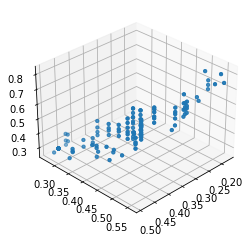

In [9]:
start = time.perf_counter()
creator.create("FitnessMin1", base.Fitness, weights=(-1.0,) * NOBJ)
creator.create("Individual", list, fitness=creator.FitnessMin)
# Toolbox initialization
#def uniform(low, up, size=None):
#    try:
#        return [random.randint(a, b) for a, b in zip(low, up)]
#    except TypeError:
#        return [random.randint(a, b) for a, b in zip([low] * size, [up] * size)]
def uniform(low, up, size=None):
  return random.sample(range(low,up),NDIM)
   
#uniform(BOUND_LOW, BOUND_UP, NDIM)
toolbox = base.Toolbox()

toolbox.register("attr_float", uniform, BOUND_LOW, BOUND_UP, NDIM)
#toolbox.register("attr_float", popGenNoSeed)
#popGenNoSeed()
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=30.0)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=20.0, indpb=1.0/NDIM)
toolbox.register("select", tools.selNSGA2)
 
#toolbox.register("select", tools.selNSGA3, ref_points=ref_points)
##



#from pymoo.model.population import Population
solutions1 = []
def main(seed=None):
    global initial_pop1
    global hyper1
    hyper1 = []
    random.seed(seed)
    # Initialize statistics object
    pop1 = toolbox.population(n=MU)
    initial_pop1 = pop1
    
    #print ("my dipo")
    #print (pop1)
    

    #hv = hypervolume(pop1)
    #rp = hv.refpoint(offset = 2.0)
    #hcm = hv.compute(rp)
    invalid_ind = [ind for ind in pop1 if not ind.fitness.valid]
    ObjV = MOCP(invalid_ind, NDIM)
    for ind, i in zip(invalid_ind, range(MU)):
        ind.fitness.values = ObjV[i, :]
    #print(ObjV)
    #print(ftDf)
    
    fit = [ind.fitness.values  for ind in pop1]
    ftDf1 = pd.DataFrame(fit)
    hyp = pg.hypervolume(ftDf1[[0, 1, 2, 3]].values)
    hypvol = hyp.compute([20, 20, 20, 20]) / np.prod([20, 20, 20, 20])
    hyper1.append(hypvol)
    # Begin the generational process

    global offspring
    
    exec_time2 = []
    avg_cpu_utilNSGA2 = []
    for gen in tqdm(range(1, NGEN)):
        #start = time.perf_counter()
        #core_amount = psutil.cpu_count()
        #core_load = [x / core_amount * 100 for x in psutil.getloadavg()]
        #avg_cpu_util2 = psutil.cpu_percent()
        
   
        
        #print("generation is ", gen)
        offspring1 = algorithms.varAnd(pop1, toolbox, CXPB, MUTPB)
        #print("OFFSPRING IS ", offspring)
        offspring1 = fixer(offspring1)
        offspring1 = fixer(offspring1)
        #print("modified offspring", offspring)
        #return offspring
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring1 if not ind.fitness.valid]
        #print("Invalid individuals ", invalid_ind)
        #function to be applied on offspring
        #  -float to integers
        #  -remove duplicates
        #  -

        ObjV = MOCP([ind for ind in offspring1 if not ind.fitness.valid], NDIM)
        for ind, i in zip(invalid_ind, range(MU)):
            ind.fitness.values = ObjV[i, :]
        # Select the next generation population from parents and offspring
        pop1 = toolbox.select(pop1 + offspring1, MU)
        fit = [ind.fitness.values  for ind in pop1]
        ftDf1 = pd.DataFrame(fit)
        hyp = pg.hypervolume(ftDf1[[0, 1, 2, 3]].values)
        hypvol = hyp.compute([20, 20, 20, 20]) / np.prod([20, 20, 20, 20])
        hyper1.append(hypvol)
        
        core_amount = psutil.cpu_count()
        core_load = [x / core_amount * 100 for x in psutil.getloadavg()]
        avg_cpu_util2 = psutil.cpu_percent()
        avg_cpu_utilNSGA2.append(avg_cpu_util2)
        end = time.perf_counter()
        end_time = end - start
    
        exec_time2.append(end_time)
        
        
        
    
    
    #'''cpu utilization'''
    #core_amount = psutil.cpu_count()
    #core_load = [x / core_amount * 100 for x in psutil.getloadavg()]
    #avg_cpu_util2 = psutil.cpu_percent()
    
    
    
    return pop1, core_load, avg_cpu_utilNSGA2, exec_time2
 
if __name__ == "__main__":
    '''time measurement'''
    tracemalloc.start()
    #start = time.perf_counter()
    pop1, core_load, avg_cpu_utilNSGA2, exec_time2 = main()
    current, peak = tracemalloc.get_traced_memory()
    end = time.perf_counter()
    tracemalloc.stop()
    exec_timeNSGA2 = end - start
    
    print("time taken is {}".format(exec_timeNSGA2) )
    print(f"current memory utilization is {current/10**6}MB")
    print(f"peak memory utilisation is {peak/10**6}MB")
    print("cpu load/core is {}".format(core_load))
    
    #print("time taken is {}".format(exec_time2))
    #print("time taken is {}".format(exec_timeNSGA2))
    #print(f"current memory utilization is {current/10**6}MB")
    #print(f"peak memory utilisation is {peak/10**6}MB")
    #print("cpu load/core is {}".format(core_load))
    #print("avg_cpu utilisation2 is {}".format(avg_cpu_utilNSGA2))
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    p1 = np.array([ind.fitness.values for ind in pop1])
    ax.scatter(p1[:, 0], p1[:, 1], p1[:, 2], marker="o", s=10)
    ax.view_init(elev=30, azim=45)
    plt.grid(True)
    plt.show()

In [10]:
avg_cpu_utilNSGA2

[16.8,
 16.0,
 15.9,
 16.2,
 19.7,
 20.6,
 19.5,
 22.4,
 19.1,
 17.9,
 20.0,
 24.6,
 22.4,
 20.2,
 22.2,
 22.4,
 18.0,
 22.7,
 24.2,
 23.1,
 15.6,
 16.6,
 28.2,
 27.2,
 23.8,
 21.2,
 15.8,
 15.1,
 20.5,
 15.9,
 15.0,
 15.5,
 19.8,
 24.5,
 24.4,
 25.5,
 22.6,
 24.5,
 18.2,
 15.5,
 15.7,
 15.1,
 15.2,
 15.2,
 15.2,
 15.3,
 15.0,
 36.4,
 31.0,
 23.6,
 23.1,
 26.8,
 23.7,
 17.3,
 15.5,
 15.6,
 15.6,
 14.9,
 14.8,
 14.8,
 15.0,
 14.8,
 14.9,
 15.2,
 14.8,
 15.2,
 14.9,
 14.7,
 14.7,
 14.9,
 14.6,
 14.7,
 14.9,
 14.9,
 14.8,
 15.2,
 14.8,
 15.0,
 14.7,
 14.7,
 14.8,
 14.7,
 14.9,
 14.8,
 15.1,
 15.0,
 14.8,
 15.0,
 14.7,
 14.8,
 15.1,
 15.0,
 14.8,
 15.2,
 14.8,
 14.7,
 15.0,
 15.0,
 17.6,
 19.7]

In [11]:
exec_time2

[411.9073075,
 614.7563934,
 816.8098059,
 1018.7275697,
 1237.8888853,
 1460.7143927,
 1679.5231367,
 1910.5750650999998,
 2128.8773188,
 2344.2844999,
 2565.2220974,
 2800.8509009,
 3025.1903562,
 3247.4821785,
 3477.1044006,
 3708.9171984,
 3920.3712814,
 4153.654196,
 4392.7787797,
 4626.1563613,
 4825.8533259,
 5031.2788055,
 5280.5432664,
 5527.279598,
 5764.6152301,
 5982.2400466,
 6179.7047761,
 6375.0944005,
 6591.0477105,
 6789.9602841,
 6987.0863999,
 7184.8383133,
 7400.6244706,
 7638.2415324,
 7877.8786968,
 8122.4795456,
 8354.110288200001,
 8592.684654600002,
 8798.741896,
 8995.249732600001,
 9194.2689059,
 9391.867648700001,
 9589.6600143,
 9787.120381699999,
 9985.1356279,
 10182.535300399999,
 10382.634009099998,
 10683.1001603,
 10962.826049700001,
 11202.063948899999,
 11442.7155647,
 11699.8117613,
 11941.6428007,
 12147.531442300002,
 12344.9494944,
 12543.120046299999,
 12743.468924699999,
 12940.8474274,
 13136.916731000001,
 13331.274531,
 13528.9764411,
 1372

In [12]:
core_load

[0.25, 0.375, 0.25]

In [13]:
initial_pop1

[[15, 11, 9, 18, 6],
 [19, 5, 7, 16, 9],
 [11, 12, 9, 10, 2],
 [14, 15, 3, 6, 16],
 [15, 14, 12, 10, 4],
 [17, 10, 14, 15, 7],
 [2, 19, 16, 5, 14],
 [5, 8, 7, 14, 10],
 [16, 6, 1, 9, 7],
 [2, 16, 19, 14, 12],
 [13, 9, 3, 5, 2],
 [7, 14, 11, 17, 18],
 [12, 3, 17, 10, 19],
 [15, 6, 4, 13, 19],
 [4, 16, 15, 13, 3],
 [1, 2, 13, 7, 15],
 [2, 9, 0, 15, 1],
 [14, 9, 3, 7, 5],
 [15, 9, 4, 14, 1],
 [15, 19, 6, 7, 8],
 [19, 15, 6, 1, 7],
 [1, 7, 4, 2, 15],
 [16, 9, 6, 1, 13],
 [12, 17, 9, 2, 13],
 [4, 0, 2, 8, 17],
 [2, 7, 10, 18, 0],
 [8, 0, 18, 3, 12],
 [13, 10, 18, 1, 16],
 [2, 12, 6, 16, 9],
 [11, 16, 9, 7, 6],
 [17, 7, 6, 3, 2],
 [17, 15, 9, 10, 6],
 [8, 12, 16, 15, 9],
 [13, 7, 18, 3, 14],
 [19, 4, 7, 2, 10],
 [7, 19, 1, 0, 14],
 [16, 0, 5, 9, 2],
 [11, 17, 14, 18, 5],
 [3, 8, 6, 15, 4],
 [7, 19, 11, 15, 9],
 [1, 10, 0, 11, 4],
 [16, 18, 15, 17, 1],
 [14, 1, 6, 3, 9],
 [15, 13, 18, 12, 1],
 [1, 5, 9, 15, 16],
 [12, 6, 5, 15, 1],
 [18, 2, 15, 13, 4],
 [3, 17, 4, 12, 1],
 [8, 15, 17, 6, 13],

In [14]:
pop1

[[1, 3, 2, 0, 8],
 [1, 3, 2, 0, 8],
 [20, 9, 0, 1, 14],
 [4, 15, 9, 20, 1],
 [1, 15, 9, 20, 4],
 [3, 15, 9, 20, 4],
 [3, 4, 0, 1, 13],
 [14, 6, 19, 7, 3],
 [3, 13, 9, 4, 0],
 [0, 2, 5, 1, 3],
 [1, 0, 17, 8, 13],
 [0, 3, 2, 4, 8],
 [3, 15, 9, 20, 5],
 [0, 17, 2, 1, 3],
 [3, 20, 2, 0, 6],
 [4, 7, 19, 8, 3],
 [0, 2, 5, 1, 3],
 [0, 19, 3, 8, 17],
 [20, 0, 2, 9, 14],
 [20, 18, 9, 3, 0],
 [0, 9, 1, 19, 14],
 [3, 15, 9, 20, 4],
 [1, 3, 2, 0, 7],
 [20, 4, 9, 1, 14],
 [17, 9, 1, 0, 13],
 [19, 4, 0, 1, 14],
 [1, 3, 2, 0, 6],
 [0, 3, 2, 8, 13],
 [2, 0, 3, 7, 13],
 [7, 3, 20, 8, 4],
 [20, 9, 3, 1, 14],
 [0, 1, 2, 3, 4],
 [8, 0, 6, 1, 2],
 [14, 6, 20, 9, 3],
 [8, 4, 2, 0, 13],
 [0, 1, 2, 3, 4],
 [0, 3, 8, 4, 13],
 [0, 2, 5, 8, 3],
 [20, 17, 1, 8, 3],
 [8, 0, 3, 5, 13],
 [8, 0, 3, 5, 13],
 [0, 6, 2, 3, 8],
 [0, 3, 5, 13, 1],
 [3, 15, 9, 20, 5],
 [3, 20, 2, 0, 6],
 [2, 3, 8, 0, 13],
 [3, 6, 19, 9, 14],
 [3, 13, 9, 4, 0],
 [20, 4, 9, 1, 14],
 [0, 8, 3, 2, 17],
 [3, 13, 2, 4, 0],
 [1, 17, 9, 13, 3],
 [

In [15]:
nsga2pop = pd.DataFrame(initial_pop1)
nsga2pop.to_csv("nsga2initial1_data.csv", index=False)

In [16]:
nsga2pop = pd.DataFrame(pop1)
nsga2pop.to_csv("nsga2final1_data.csv", index=False)

In [17]:
print("avg_cpu utilisation is {}".format(avg_cpu_utilNSGA2))

avg_cpu utilisation is [16.8, 16.0, 15.9, 16.2, 19.7, 20.6, 19.5, 22.4, 19.1, 17.9, 20.0, 24.6, 22.4, 20.2, 22.2, 22.4, 18.0, 22.7, 24.2, 23.1, 15.6, 16.6, 28.2, 27.2, 23.8, 21.2, 15.8, 15.1, 20.5, 15.9, 15.0, 15.5, 19.8, 24.5, 24.4, 25.5, 22.6, 24.5, 18.2, 15.5, 15.7, 15.1, 15.2, 15.2, 15.2, 15.3, 15.0, 36.4, 31.0, 23.6, 23.1, 26.8, 23.7, 17.3, 15.5, 15.6, 15.6, 14.9, 14.8, 14.8, 15.0, 14.8, 14.9, 15.2, 14.8, 15.2, 14.9, 14.7, 14.7, 14.9, 14.6, 14.7, 14.9, 14.9, 14.8, 15.2, 14.8, 15.0, 14.7, 14.7, 14.8, 14.7, 14.9, 14.8, 15.1, 15.0, 14.8, 15.0, 14.7, 14.8, 15.1, 15.0, 14.8, 15.2, 14.8, 14.7, 15.0, 15.0, 17.6, 19.7]


In [18]:
sum(core_load)

0.875

In [19]:
sum(exec_time2)

1107038.0493756996

In [20]:
sum(avg_cpu_utilNSGA2)

1792.0000000000002

In [21]:
nsga2pop = pd.DataFrame(initial_pop1)
col_name = ['output_'+ str(col) for col in range (5)]
nsga2pop[col_name] = pop1
nsga2pop['exec_time2'] = sum(exec_time2)
nsga2pop['avg_cpu_utilNSGA2'] = sum(avg_cpu_utilNSGA2)
nsga2pop['core_load'] = sum(core_load)
nsga2pop.to_csv("nsga2optimised1_data.csv", index=False)

In [22]:
col_name = ['output_'+ str(col) for col in range (5)]
nsga2pop[col_name] = pop1
nsga2pop

,0,1,2,3,4,output_0,output_1,output_2,output_3,output_4,exec_time2,avg_cpu_utilNSGA2,core_load
0,15,11,9,18,6,1,3,2,0,8,1.107038e+06,1792.0,0.875
1,19,5,7,16,9,1,3,2,0,8,1.107038e+06,1792.0,0.875
2,11,12,9,10,2,20,9,0,1,14,1.107038e+06,1792.0,0.875
3,14,15,3,6,16,4,15,9,20,1,1.107038e+06,1792.0,0.875
4,15,14,12,10,4,1,15,9,20,4,1.107038e+06,1792.0,0.875
5,17,10,14,15,7,3,15,9,20,4,1.107038e+06,1792.0,0.875
6,2,19,16,5,14,3,4,0,1,13,1.107038e+06,1792.0,0.875
7,5,8,7,14,10,14,6,19,7,3,1.107038e+06,1792.0,0.875
8,16,6,1,9,7,3,13,9,4,0,1.107038e+06,1792.0,0.875
9,2,16,19,14,12,0,2,5,1,3,1.107038e+06,1792.0,0.875
